In [1]:
import pandas as pd
import pandahouse
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from read_db.CH import Getch

q = """
SELECT exp_group, 
       user_id,
       countIf(action = 'like') as likes,
       countIf(action = 'view') as views,
       likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2022-03-28' and '2022-04-03'
        and exp_group in (2,3)
GROUP BY exp_group, user_id
"""

df = Getch(q, db='simulator_20220420').df
df.head(10)

,exp_group,user_id,likes,views,ctr
0,3,115383,11,36,0.305556
1,3,123580,15,92,0.163043
2,2,131473,26,148,0.175676
3,2,23985,12,66,0.181818
4,2,24523,17,120,0.141667
5,2,24239,53,119,0.445378
6,3,19647,21,146,0.143836
7,2,14680,8,70,0.114286
8,2,127588,7,44,0.159091
9,2,119153,14,61,0.229508


In [2]:
df.groupby('exp_group').count()

,user_id,likes,views,ctr
exp_group,,,,
2,8480,8480,8480,8480
3,8569,8569,8569,8569


<AxesSubplot:xlabel='ctr', ylabel='Count'>

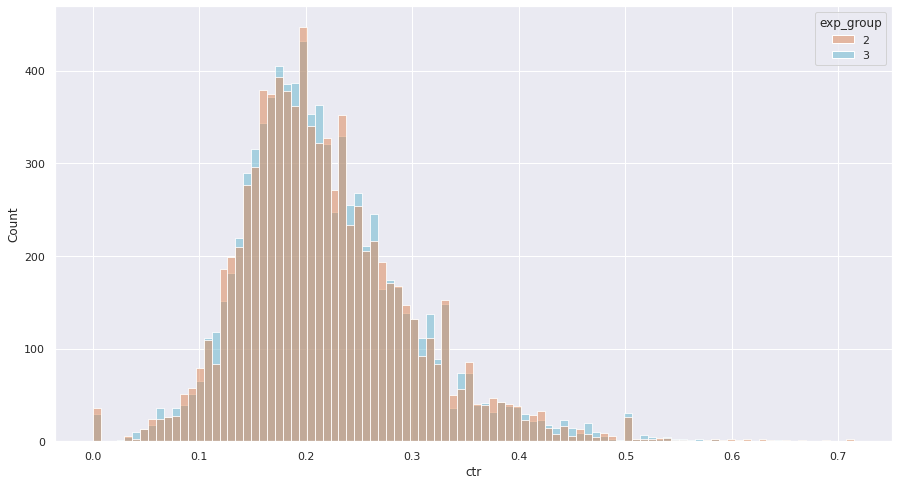

In [3]:
sns.set()
plt.figure(figsize = (15,8))
sns.histplot(data = df, x = 'ctr', hue ='exp_group', palette=["C1", "C9"])

In [6]:
pvals = []
for i in range(10000):
    i, p = stats.ttest_ind(df[df.exp_group == 2].ctr.sample(500, replace=True),
                              df[df.exp_group == 3].ctr.sample(500, replace=True),
                              equal_var=False)
    pvals.append(p)

[Text(0.5, 1.0, 'p_values distibution chart')]

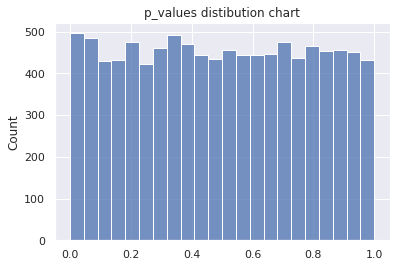

In [8]:
sns.histplot(pvals).set(title='p_values distibution chart')

In [9]:
res = sum(np.array(pvals)<0.05)/10000
print(f'Процент p value меньше или равных 0.05: {res}%')

Процент p value меньше или равных 0.05: 0.0544%


Результатом проведения A/A t-теста c бутстрепом  при уровне значимости  0.05 является распределение значений p-value близкое к равномерному. Значение p-value 0.054 "плюс/минус" равняется alpha. 

Вывод: Система сплитования работает корректно. Статистически значимые различия между двумя группами встречались бы только в результате случайного ложного срабатывания.